# Modelo de Regresión Lineal General

En clases pasadas vimos que la forma más sencilla de modelar la relación entre dos (o más) variables consiste en asumir que la relación entre ambas variables es fundamentalmente lineal.

Específicamente, en el contexto de modelos probabilísticos, asumimos que

$$ Y  = \mu(X) + \varepsilon $$

Donde:
* $\mu(X) = X\boldsymbol{\beta}$
* $\varepsilon | X \sim i.i.d. \mathcal{N} (0, \sigma^2)$  

Es decir,
$$ Y = X\beta + \varepsilon$$
con
$$ Y | X \sim  \mathcal{N} (\mu(X), \sigma^2)$$
  
---
Si tomamos $n$ samples de $Y$ y $X$, podemos expresar la relación como

$$ \mathbf{y} = \mathbb{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$


donde:

* $\mathbf{y}$ es el vector de observaciones de la variable dependiente (de tamaño $n\times1$),
*$\mathbb{X}$ es la matriz de diseño o de regresores (de tamaño $n\times (p+1)$)
* $\boldsymbol{\beta}$ es el vector de parámetros a estimar (de tamaño $(p+1)\times1)$,
* $\boldsymbol{\varepsilon}$ es el vector de errores aleatorios (de tamaño $n\times1$).

Donde tenemos

* $\mathbb{E}(\boldsymbol{\varepsilon} | \mathbb{X}) = \mathbf{0}_n$
* $\mathbb{V}(\boldsymbol{\varepsilon} | \mathbb{X}) = \sigma^2 \mathbf{I}_n$
* $ \boldsymbol{\varepsilon} | \mathbb{X} \sim  \mathcal{N} (\mathbb{X}\boldsymbol{\beta},  \sigma^2 \mathbf{I}_n)$  
  
    
## Inferencia en el modelo lineal
Bajo estos supuestos (y asumiendo que la matriz de diseño tiene rango $p+1$, por lo que $\mathbb{X}^T\mathbb{X}$ es una matriz no singular), el estimador de mínimos cuadrados de $\boldsymbol{\beta}$ (que coincide con su estimador por máxima verosimilitud) es

$$
\hat{\boldsymbol{\beta}}= (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\mathbf{y}
$$

Por lo que

$$
\hat{\boldsymbol{\beta}} = \boldsymbol{\beta} + (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\boldsymbol{\varepsilon}
$$

Esta última expresión muestra que, bajo el supuesto de normalidad de los residuos, los estimadores de mínimos cuadrados tienen la distribución

$$\
\hat{\boldsymbol{\beta}} | \mathbb{X} \sim \mathcal{N}(\boldsymbol{\beta},  \sigma^2(\mathbb{X}^T\mathbb{X})^{-1})
$$

Este resultado implica que:

* **Esperanza:** el estimador es insesgado: $\mathbb{E}(\boldsymbol{\hat\beta})=\mathbb{E}(\boldsymbol{\hat\beta}| \mathbb{X}) = \boldsymbol{\beta}$,
* **Varianza-Covarianza:** La matriz de varianzas y covarianzas de los estimadores depende de la varianza de los errores $\sigma$ y de la estructura de los datos \mathbb{X}. $\mathbb{V}(\boldsymbol{\boldsymbol{\hat\beta}} | \mathbb{X}) = \sigma^2(\mathbb{X}^T\mathbb{X})^{-1}$


Dado que los estimadores de MCO son normales, se pueden utilizar distribuciones conocidas para realizar inferencias sobre los parámetros del modelo.

Por ejemplo:

###Pruebas de hipótesis:
#### Para un parámetro específico $\beta_j$

La hipótesis nula $H_0: \beta_j = \beta_j^0$ se puede probar utilizando un estadístico $t$, que sigue una distribución t de Student bajo la hipótesis nula.

 $$
 t= \frac{\hat\beta_j - \beta_j^0}{\hat{SE}(\hat\beta_j)} \sim t_{n-(p+1)}
 $$

 donde $\hat{SE}(\hat\beta_j)$ es el error estándar estimado del estimador $\hat{SE}(\hat\beta_j)=\hat\sigma \sqrt{a_{jj}}$ con $a_{jj}$ el elemento correspondiente de la matriz $(\mathbb{X}^T\mathbb{X})^{-1}$


####Intervalos de confianza:
Cuando la varianza de los errores $\sigma^2$ es deconodida, los intervalos de confianza para los parámetros también pueden construirse a partir de la distribución t de Student, dado un nivel de confianza $1-\alpha$.

$$\hat\beta_j \pm t_{\alpha/2, n-(p+1)} \cdot \hat{SE}(\hat{\beta}_j)$$


Estos procedimientos permiten extraer conclusiones sobre la relación entre las variables explicativas y la variable dependiente, permitiendo evaluar la significancia estadística de los efectos estimados y construir intervalos de confianza para los parámetros del modelo.


## Estimación de una Curva Salarial

Para este ejercicio vamos a analizar los determinantes del salario utilizando un modelo de regresión lineal. El ejercicio se concentra en la estimación e interpretación de los coeficientes. Para eso, vamos a trabajar la base de datos "wage1.txt" del libro de *Introducción a la Econometría* de Wooldridge(2009), que es una parte de una base de datos de corte transversal de 526 trabajadores de Estados Unidos correspondientes a 1976.

Se pide:

i. Graficar los histogramas de las variables *wage* y *lwage*, que tienen los salarios horarios promedio del año y su logaritmo y argumentar por qué tiene más sentido considerar modelar la variable *lwage*.  

ii. Estimar el modelo $lwage \sim educ + exper + expersq + female$.

iii. Estimar el error irreducible del modelo $\sigma^2$

iv. Estimar la variación esperada sobre el logaritmo del salario del sexo con una confianza del 95%.

v. Realizar una prueba de hipótesis para evaluar si la educación y el sexo tienen un efecto estadísticamente significativo sobre el salario.


In [12]:
import pandas as pd

df = pd.read_csv('wage1.txt', sep='\t')


i. Graficar los histogramas de las variables *wage* y *lwage*, que tienen los salarios horarios promedio del año y su logaritmo y argumentar por qué tiene más sentido considerar modelar la variable *lwage*.  

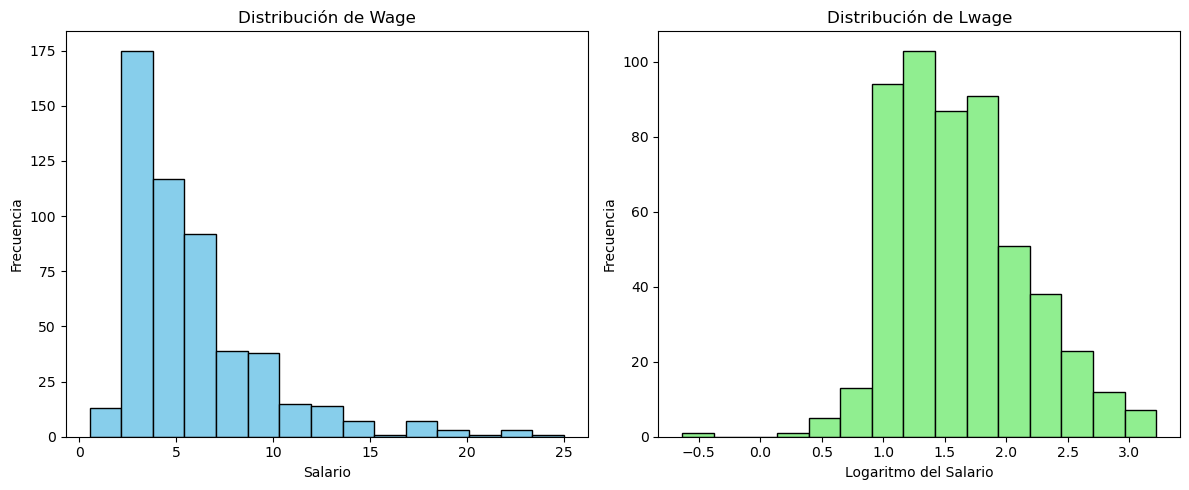

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura
fig, axs = plt.subplots(1,2,figsize=(12, 5))

# Histograma de wage
axs[0].hist(df['wage'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Wage')
axs[0].set_xlabel('Salario')
axs[0].set_ylabel('Frecuencia')

# Histograma de lwage
axs[1].hist(df['lwage'], bins=15, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de Lwage')
axs[1].set_xlabel('Logaritmo del Salario')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


ii. Estimar el modelo $lwage \sim educ + exper + expersq + female$.

In [14]:
def get_beta_hat(X, y):
    """
    Calcula los coeficientes estimados (beta_hat) en un modelo de regresión lineal múltiple.

    Parámetros:
    X: numpy array de dimensión (n_samples, n_features)
       Matriz de diseño (variables independientes), incluyendo la columna de unos para el intercepto.
    y: numpy array de dimensión (n_samples,)
       Vector de la variable dependiente.

    Retorna:
    beta_hat: numpy array de dimensión (n_features,)
              Vector de coeficientes estimados.
    """
    # Calcular beta_hat usando la fórmula de MCO: β = (X'X)^(-1)X'y
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>b</mi><mn>1</mn></msub><mo>=</mo><mfrac><mrow><mi mathvariant="normal">∂</mi><mi>y</mi></mrow><mrow><mi mathvariant="normal">∂</mi><msub><mi>x</mi><mn>1</mn></msub></mrow></mfrac></mrow><annotation encoding="application/x-tex">b_1 = \frac{\partial y}{\partial x_1} 
</annotation></semantics></math>

In [15]:
# Definir variables independientes y dependiente
regresores = ['educ', 'exper', 'expersq', 'female']

X = df[regresores].values
y = df['lwage'].values

# Agregar una columna de unos para el intercepto
X = np.column_stack((np.ones(X.shape[0]), X))

# Estimación de coeficientes mediante la fórmula de MCO: β = (X'X)^(-1)X'y
beta_hat = get_beta_hat(X, y)
print('Coeficientes estimados:', beta_hat)

Coeficientes estimados: [ 0.39048305  0.08413608  0.03890997 -0.00068602 -0.33718676]


iii. Estimar el error irreducible del modelo $\sigma^2$

In [29]:
# Obtener predicciones (y_hat)
y_hat = X @ beta_hat

# Obtener los residuos
resids = y - y_hat

# Obtener SCR (RSS)
scr = np.sum(resids**2)

# Obtener sigma2_hat
sigma2_hat = scr / (X.shape[0] - X.shape[1])

print('Error irreducible estimado:', sigma2_hat)

Error irreducible estimado: 0.8461375999293073


iv. Estimar la variación esperada sobre el logaritmo del salario del sexo con una confianza del 95%.

In [31]:
# Obtener la matriz de varianzas y covarianzas no-escalada
XTX_1 = np.linalg.inv(X.T @ X)

# Calcular la varianza de los estimadores
fisher_info = sigma2_hat * XTX_1  ##matriz de varianza y covarianza de los errores

# Coeficiente estimado y su desviación estándar para female
beta_female = beta_hat[-1]  # Último coeficiente (female)
se_beta_female = np.sqrt(fisher_info[-1, -1])

# Intervalo de confianza al 95%

#necesito saber que distribucion tiene la estimacion puntual, aca es t porque no conozco el sigma, si lo hubiera tenido era la normal
from scipy.stats import t

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=X.shape[0] - X.shape[1])
conf_interval = [beta_female - t_critical * se_beta_female, beta_female + t_critical * se_beta_female]

print('Intervalo de confianza al 95% para el coeficiente de female:', conf_interval)

Intervalo de confianza al 95% para el coeficiente de female: [-1.4071506698692622, 2.7593252859218778]


v. Realizar una prueba de hipótesis para evaluar si la educación y el sexo tienen un efecto estadísticamente significativo sobre el salario.

In [33]:
# Coeficiente estimado y su desviación estándar para educ y female
beta_educ = beta_hat[1]
se_beta_educ = np.sqrt(fisher_info[1, 1])

# Prueba t para educ
t_stat_educ = beta_educ / se_beta_educ
p_value_educ = 2 * (1 - t.cdf(np.abs(t_stat_educ), df=X.shape[0] - X.shape[1]))

print('Estadístico t para educ:', t_stat_educ)
print('p-valor para educ:', p_value_educ)

# Prueba t para female
# t_stat_female = (beta_female - n) / se_beta_female -> n = lo que pienso que es la H0
t_stat_female = beta_female / se_beta_female
p_value_female = 2 * (1 - t.cdf(np.abs(t_stat_female), df=X.shape[0] - X.shape[1])) # 1 - alpha/2

print('Estadístico t para female:', t_stat_female)
print('p-valor para female:', p_value_female)

Estadístico t para educ: 3.311856632240367
p-valor para educ: 0.0013028903446004048
Estadístico t para female: 0.6441156364223332
p-valor para female: 0.5210206378986719


*BONUS: Estimacion mediante* `statsmodels`

In [34]:
import statsmodels.formula.api as smf

# Definir ecuación de regresión
equation = 'lwage ~ educ + exper + expersq + female'

# Ajustar el modelo por mínimos cuadrados (OLS)
model = smf.ols(equation, data=df)

# Estimar el modelo
results = model.fit()

# Imprimir resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     86.69
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.03e-56
Time:                        09:57:41   Log-Likelihood:                -279.27
No. Observations:                 526   AIC:                             568.5
Df Residuals:                     521   BIC:                             589.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3905      0.102      3.820      0.0

## Práctica 3. Ejercicio 6

Generar $n=100$ samples de $X_1 \sim  \mathcal{U}(0,1), Z\sim \mathcal{N}(0,0.01)$ y $\varepsilon\sim \mathcal{N}(0,1)$. A partir de estas muestras generar $X_2= 0.5X_1+Z$ y de $Y=2+2X_1+0.3X_2 + \varepsilon$

a. Calcular la correlación entre las muestras de $X_1$ y $X_2$ y graficar su distribución conjunta.  
b. Ajustar un modelo por mínimos cuadrados para predecir $Y$ usando como dato tanto $X_1$ como $X_2$. Describir los resultados obtenidos incluyendo los los coeficientes de regresión $\hat\beta_0, \hat\beta_1, \hat\beta_2$, y analizar la relación entre estos coeficientes y los verdaderos valores  $\beta_0, \beta_1, \beta_2$  
c. Ajustar modelos de regresión lineal por mínimos cuadrados para $Y$ y analizar resultados
  - utilizando solamente datos de $X_1$ e $Y$
  - utilizando solamente datos de $X_2$ e $Y$

d. Graficar la distribución conjunta de $\hat\beta_1$ y $\hat\beta_2$

In [20]:
from scipy import stats
# Número de muestras
n = 100

true_betas = [2,2,0.3]

# Generar X1, Z y epsilon
X1 = stats.uniform.rvs(0, 1, size=n)  # X1 ~ Uniform(0, 1)
Z = stats.norm.rvs(0, 0.1, size=n)    # Z ~ Normal(0, 0.1)
epsilon = stats.norm.rvs(0, 1, size=n) # epsilon ~ Normal(0, 1)

# Generar X2
X2 = 0.5 * X1 + Z

# Armar matriz de diseño
X = np.column_stack((np.ones(n),X1, X2))

# Generary y
y = X @ true_betas + epsilon

In [21]:
# 1. Calcular la correlación entre X1 y X2

correlation_matrix = np.corrcoef(X1, X2)
correlation_matrix[0,1]

0.8169452268340306

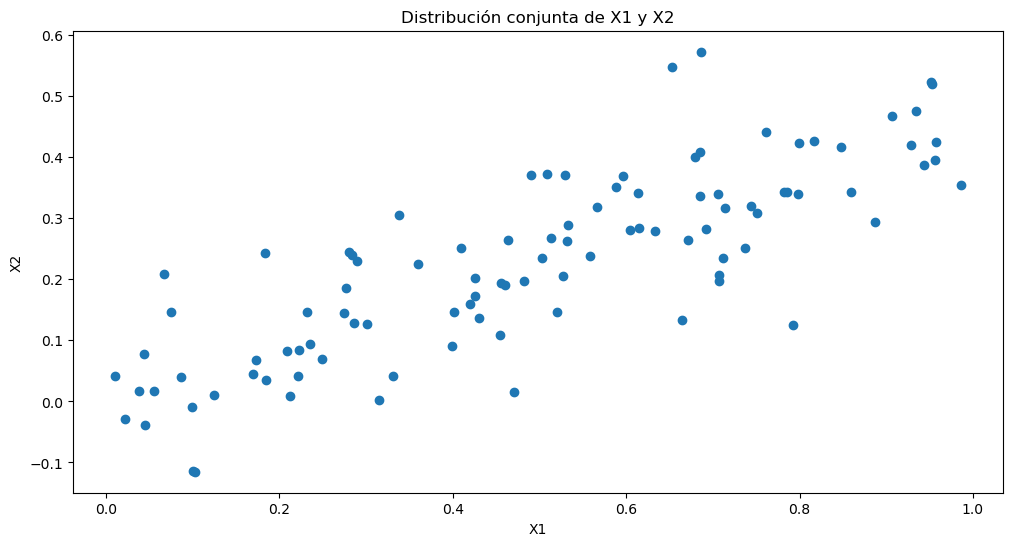

In [22]:
# ... y graficar su distribución conjunta

fig, ax = plt.subplots(figsize = (12, 6))

ax.scatter(X1, X2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Distribución conjunta de X1 y X2')

plt.show()

Ajustar un modelo por mínimos cuadrados para predecir $Y$ usando como dato tanto $X_1$ como $X_2$. Describir los resultados obtenidos incluyendo los los coeficientes de regresión $\hat\beta_0, \hat\beta_1, \hat\beta_2$, y analizar la relación entre estos coeficientes y los verdaderos valores  $\beta_0,

In [23]:
# Ajustar Y ~ X1 + X2 por MCO. Describir los resultados y comparar con los verdaderos valores de los parámetros

In [24]:
beta_hat = get_beta_hat(X, y)
print('Estimadores:',beta_hat.round(3))
print('Estimadores:',true_betas)

Estimadores: [1.958 1.542 1.84 ]
Estimadores: [2, 2, 0.3]


In [25]:
# c. Estimar modelos utilizando...

# ... solamente X1
design_x1 = np.column_stack((np.ones(n),X1))
beta_hat_x1 = get_beta_hat(design_x1, y)

print('Estimación utilizando solamente X1:')
print('Estimador:',beta_hat_x1[1].round(3))
print('Parámetro:',true_betas[1])

print('-'*30)

# ... solamente X2
print('Estimación utilizando solamente X2:')
design_x2 = np.column_stack((np.ones(n),X2))
beta_hat_x2 = get_beta_hat(design_x2, y)
print('Estimador:',beta_hat_x2[1].round(3))
print('Parámetro:',true_betas[2])

Estimación utilizando solamente X1:
Estimador: 2.381
Parámetro: 2
------------------------------
Estimación utilizando solamente X2:
Estimador: 4.098
Parámetro: 0.3


In [26]:
# Graficar la distribución conjunta de beta_hat1 y beta_hat2
# Para esto vamos a realizar un ejercicio de simulación


# Número de repeticiones para la simulación
num_simulations = 1000

# Almacenar los coeficientes
beta1_estimates = []
beta2_estimates = []

for _ in range(num_simulations):

    # Generar error
    epsilon = stats.norm.rvs(0, 1, size=n) # epsilon ~ Normal(0, 1)

    # Generary y
    y = X @ true_betas + epsilon

    # Estimar por MCO
    beta_hat = get_beta_hat(X, y)

    # Almacenar coeficientes
    beta1_estimates.append(beta_hat[1])
    beta2_estimates.append(beta_hat[2])

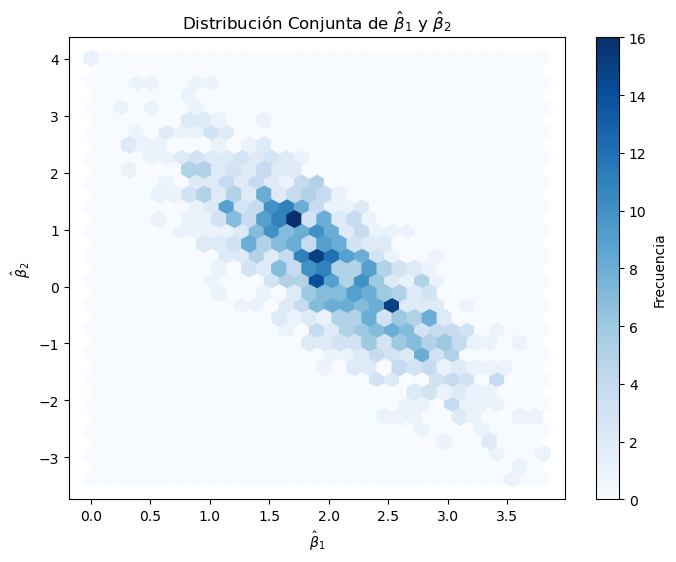

In [27]:
# Graficar la distribución conjunta
plt.figure(figsize=(8, 6))
plt.hexbin(beta1_estimates, beta2_estimates, gridsize=30, cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Distribución Conjunta de $\hat{\\beta}_1$ y $\hat{\\beta}_2$')
plt.xlabel('$\\hat{\\beta}_1$')
plt.ylabel('$\\hat{\\beta}_2$')
plt.show()


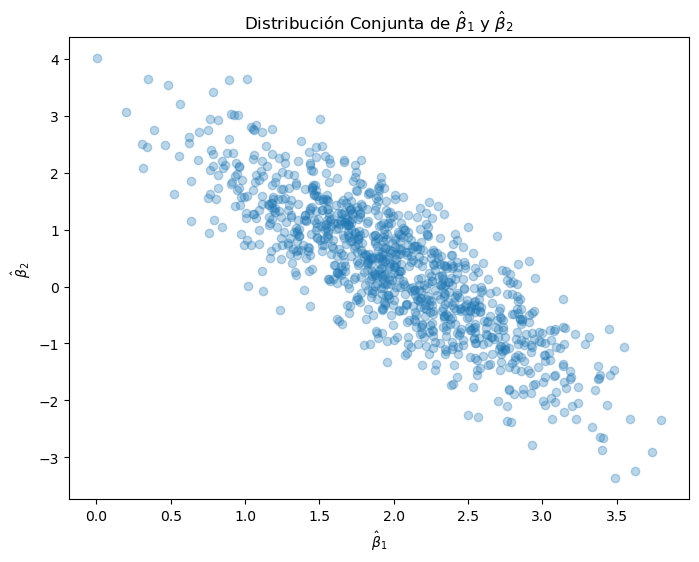

In [28]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(beta1_estimates, beta2_estimates, alpha=.3)

plt.title('Distribución Conjunta de $\hat{\\beta}_1$ y $\hat{\\beta}_2$')
ax.set_xlabel('$\\hat{\\beta}_1$')
ax.set_ylabel('$\\hat{\\beta}_2$')

plt.show()